# 02 - Data Cleaning and Preparation

## 1. Load Raw Data
We load the raw CSV file generated from the raw Excel data.


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sys
sys.path.append('..')
from src.utils import save_figures
from src.eda import create_distribution_plot

In [2]:
df = pd.read_csv('../data/raw/credit_card_default_raw.csv')
# Make the second row the header and remove the first row
df.columns = df.iloc[0]
df = df.iloc[1:].reset_index(drop=True)

# Remove the ID column as it's not needed for analysis
df = df.drop('ID', axis=1)

# Rename 'default payment next month' to 'default'
df = df.rename(columns={'default payment next month': 'default'})

df.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default
0,20000,2,2,1,24,2,2,-1,-1,-2,...,0,0,0,0,689,0,0,0,0,1
1,120000,2,2,2,26,-1,2,0,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,90000,2,2,2,34,0,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,50000,2,2,1,37,0,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,50000,1,2,1,57,-1,0,-1,0,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


## 2. Inspect Data
Check for missing values, data types, and basic statistics.


In [3]:
print(df.info())
print(df.isnull().sum())
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 24 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   LIMIT_BAL  30000 non-null  object
 1   SEX        30000 non-null  object
 2   EDUCATION  30000 non-null  object
 3   MARRIAGE   30000 non-null  object
 4   AGE        30000 non-null  object
 5   PAY_0      30000 non-null  object
 6   PAY_2      30000 non-null  object
 7   PAY_3      30000 non-null  object
 8   PAY_4      30000 non-null  object
 9   PAY_5      30000 non-null  object
 10  PAY_6      30000 non-null  object
 11  BILL_AMT1  30000 non-null  object
 12  BILL_AMT2  30000 non-null  object
 13  BILL_AMT3  30000 non-null  object
 14  BILL_AMT4  30000 non-null  object
 15  BILL_AMT5  30000 non-null  object
 16  BILL_AMT6  30000 non-null  object
 17  PAY_AMT1   30000 non-null  object
 18  PAY_AMT2   30000 non-null  object
 19  PAY_AMT3   30000 non-null  object
 20  PAY_AMT4   30000 non-null  o

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default
count,30000,30000,30000,30000,30000,30000,30000,30000,30000,30000,...,30000,30000,30000,30000,30000,30000,30000,30000,30000,30000
unique,81,2,7,4,56,11,11,11,11,10,...,21548,21010,20604,7943,7899,7518,6937,6897,6939,2
top,50000,2,2,2,29,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
freq,3365,18112,14030,15964,1605,14737,15730,15764,16455,16947,...,3195,3506,4020,5249,5396,5968,6408,6703,7173,23364


In [4]:
# Get categorical variables and their unique values
categorical_cols = ['SEX', 'EDUCATION', 'MARRIAGE', 'default']
for col in categorical_cols:
    print(f"\n{col} unique values:")
    print(df[col].value_counts().sort_index())



SEX unique values:
SEX
1    11888
2    18112
Name: count, dtype: int64

EDUCATION unique values:
EDUCATION
0       14
1    10585
2    14030
3     4917
4      123
5      280
6       51
Name: count, dtype: int64

MARRIAGE unique values:
MARRIAGE
0       54
1    13659
2    15964
3      323
Name: count, dtype: int64

default unique values:
default
0    23364
1     6636
Name: count, dtype: int64


In [5]:
df[['SEX', 'EDUCATION', 'MARRIAGE']].describe()

,SEX,EDUCATION,MARRIAGE
count,30000,30000,30000
unique,2,7,4
top,2,2,2
freq,18112,14030,15964


In [6]:
df[['PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']].describe()

,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6
count,30000,30000,30000,30000,30000,30000
unique,11,11,11,11,10,10
top,0,0,0,0,0,0
freq,14737,15730,15764,16455,16947,16286


In [7]:
df[['BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6']].describe()

,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6
count,30000,30000,30000,30000,30000,30000
unique,22723,22346,22026,21548,21010,20604
top,0,0,0,0,0,0
freq,2008,2506,2870,3195,3506,4020


In [8]:
df[['PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']].describe()

,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
count,30000,30000,30000,30000,30000,30000
unique,7943,7899,7518,6937,6897,6939
top,0,0,0,0,0,0
freq,5249,5396,5968,6408,6703,7173


In [9]:
df.LIMIT_BAL.describe()

count     30000
unique       81
top       50000
freq       3365
Name: LIMIT_BAL, dtype: object

## 3. Data Cleaning
- Check for duplicates and remove if any.
- Ensure all columns are of correct type.


In [10]:
total = df.isnull().sum().sort_values(ascending = False)
percent = (df.isnull().sum()/df.isnull().count()*100).sort_values(ascending = False)
pd.concat([total, percent], axis=1, keys=['Total', 'Percent']).transpose()

,LIMIT_BAL,SEX,PAY_AMT6,PAY_AMT5,PAY_AMT4,PAY_AMT3,PAY_AMT2,PAY_AMT1,BILL_AMT6,BILL_AMT5,...,PAY_6,PAY_5,PAY_4,PAY_3,PAY_2,PAY_0,AGE,MARRIAGE,EDUCATION,default
Total,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Percent,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Figure saved to ../outputs/figures/target_value_distribution.png


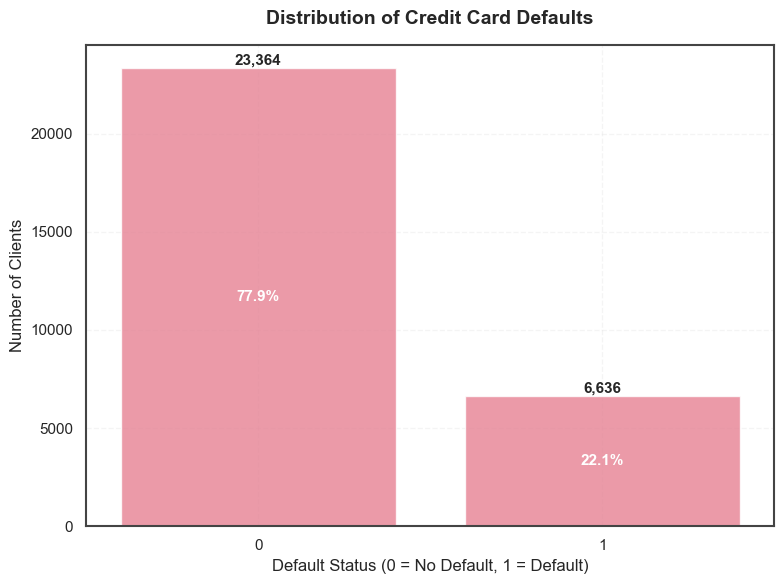

In [11]:
# Get default counts and create dataframe
temp = df["default"].value_counts()
df_plt = pd.DataFrame({'default': temp.index, 'values': temp.values})

# Create and save plot
ax = create_distribution_plot(
    data=df_plt,
    x_col='default',
    y_col='values',
    title='Distribution of Credit Card Defaults',
    xlabel='Default Status (0 = No Default, 1 = Default)',
    ylabel='Number of Clients',
    filename='target_value_distribution.png'
)

save_figures(plt.gcf(), 'target_value_distribution.png')
plt.show()

## 4. Save Cleaned Data
Save the cleaned DataFrame for use in EDA and modeling.


In [12]:
df.to_csv('../data/processed/credit_card_default_cleaned.csv', index=False)
